### 필요 라이브러리 임포트

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

### 원본 데이터 불러오기

In [4]:
df = pd.read_csv('./data/smart_phone_raw_data.csv')
df.head()

,ID,DM1,DM2,DM3,DM4,KK1,KK2,WT,Q1A_1,Q1A_2,...,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21
0,1,3,1,NaN,1,3,NaN,1581.361297,1,1,...,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0
1,2,3,2,NaN,1,3,NaN,1506.828478,1,1,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0
2,3,2,1,3.0,1,2,2.0,1380.620423,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,2,2.0,1,3,2.0,1070.768474,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,1,NaN,1,3,NaN,1590.508696,1,1,...,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0


In [6]:
df.shape

(28575, 179)

### 시각화를 위한 데이터 뽑아내기

In [8]:
media_df = df[['Q8','Q8_1_1', 'Q8_1_2', 'Q8_1_3', 'Q8_1_4', 'Q8_1_5', 'Q8_1_6']]

In [9]:
media_df.head()

,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,1,1.0,2.0,NaN,NaN,NaN,NaN
1,1,1.0,2.0,NaN,NaN,NaN,NaN
2,1,3.0,4.0,5.0,NaN,NaN,NaN
3,1,2.0,3.0,4.0,NaN,NaN,NaN
4,1,1.0,2.0,NaN,NaN,NaN,NaN


### NaN 값 처리

In [10]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q8      28575 non-null  int64  
 1   Q8_1_1  24910 non-null  float64
 2   Q8_1_2  18797 non-null  float64
 3   Q8_1_3  9350 non-null   float64
 4   Q8_1_4  3307 non-null   float64
 5   Q8_1_5  1322 non-null   float64
 6   Q8_1_6  3 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [11]:
media_df.isnull()

,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,False,False,False,True,True,True,True
1,False,False,False,True,True,True,True
2,False,False,False,False,True,True,True
3,False,False,False,False,True,True,True
4,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...
28570,False,True,False,True,True,False,True
28571,False,True,True,True,True,True,True
28572,False,False,False,False,False,True,True
28573,False,False,False,True,True,True,True


In [8]:
media_df['Q8'].fillna(0, inplace=True)
for i in range(1,7):
    media_df['Q8_1_%d' %i].fillna(0, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q8      28575 non-null  int64  
 1   Q8_1_1  28575 non-null  float64
 2   Q8_1_2  28575 non-null  float64
 3   Q8_1_3  28575 non-null  float64
 4   Q8_1_4  28575 non-null  float64
 5   Q8_1_5  28575 non-null  float64
 6   Q8_1_6  28575 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [10]:
media_df.head()

,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,1,1.0,2.0,0.0,0.0,0.0,0.0
1,1,1.0,2.0,0.0,0.0,0.0,0.0
2,1,3.0,4.0,5.0,0.0,0.0,0.0
3,1,2.0,3.0,4.0,0.0,0.0,0.0
4,1,1.0,2.0,0.0,0.0,0.0,0.0


### 스마트폰으로 온라인 동영상 서비스 이용 여부 (1:있다 2:없다)

In [11]:
media_df_Q8 = media_df[['Q8']]

In [12]:
print('이용여부 분포:', media_df[['Q8']].value_counts())

이용여부 분포: Q8
1     25340
2      3235
dtype: int64


In [13]:
media_df_Q8[media_df_Q8['Q8']==1].sum()

Q8    25340
dtype: int64

In [14]:
media_df_Q8[media_df_Q8['Q8']==2].sum()/2

Q8    3235.0
dtype: float64

In [15]:
total = media_df_Q8[media_df_Q8['Q8']==1].sum() + media_df_Q8[media_df_Q8['Q8']==2].sum()/2

In [16]:
total

Q8    28575.0
dtype: float64

In [17]:
yes = media_df_Q8[media_df_Q8['Q8']==1].sum() / total * 100

In [18]:
yes = yes.to_frame()

In [19]:
yes

,0
Q8,88.678915


In [20]:
no =  media_df_Q8[media_df_Q8['Q8']==2].sum() / total * 100

In [21]:
no = no.to_frame()

In [22]:
no

,0
Q8,22.64217


In [23]:
total_df = pd.concat([yes,no])
total_df

,0
Q8,88.678915
Q8,22.642170


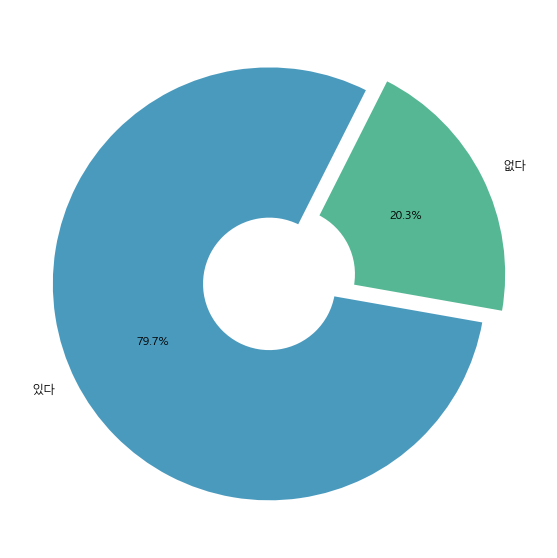

In [24]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = total_df[0].tolist()
labels = ['있다', '없다'] 
explode = [0.05, 0.05]
colors = ['#4A9ABE', '#55B794'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

- 스마트폰으로 영상을 시청한 비율이 있다가 80%로 대부분을 차지 

### 자주 이용하는 서비스 유형

In [114]:
media_df1=media_df[media_df['Q8']==1]

In [115]:
media_df1

,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,1,1.0,2.0,0.0,0.0,0.0,0.0
1,1,1.0,2.0,0.0,0.0,0.0,0.0
2,1,3.0,4.0,5.0,0.0,0.0,0.0
3,1,2.0,3.0,4.0,0.0,0.0,0.0
4,1,1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
28569,1,2.0,0.0,0.0,0.0,0.0,0.0
28570,1,0.0,2.0,0.0,0.0,5.0,0.0
28572,1,1.0,2.0,3.0,5.0,0.0,0.0
28573,1,1.0,2.0,0.0,0.0,0.0,0.0


### 유형 별 개수 확인
- Q8_1_1에 1번 문항만 표시되어 있는게 아니라 1~5번까지 다양하게 표시되어 있음
- 0번은 선택되지 않은 것
- 전체 데이터프레임에서 1번의 총 개수, 2번의 총 개수, ... 이런식으로 구해야함

In [116]:
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_1'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_2'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_3'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_4'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_5'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_6'].value_counts())

자주 이용하는 서비스 유형: 1.0    10824
2.0     8962
3.0     3879
5.0      713
4.0      532
0.0      430
Name: Q8_1_1, dtype: int64
자주 이용하는 서비스 유형: 2.0    8878
0.0    6543
3.0    6462
4.0    1920
5.0    1529
6.0       8
Name: Q8_1_2, dtype: int64
자주 이용하는 서비스 유형: 0.0    15990
3.0     4955
4.0     2109
5.0     1994
2.0      291
6.0        1
Name: Q8_1_3, dtype: int64
자주 이용하는 서비스 유형: 0.0    22033
4.0     1887
5.0     1419
3.0        1
Name: Q8_1_4, dtype: int64
자주 이용하는 서비스 유형: 0.0    24018
5.0     1321
4.0        1
Name: Q8_1_5, dtype: int64
자주 이용하는 서비스 유형: 0.0    25337
6.0        3
Name: Q8_1_6, dtype: int64


### 문항별 1~6번 개수 구해서 데이터 프레임 생성

In [117]:
Q8_1_1 = pd.DataFrame(media_df1['Q8_1_1'].value_counts()).sort_index()
Q8_1_2 = pd.DataFrame(media_df1['Q8_1_2'].value_counts()).sort_index()
Q8_1_3 = pd.DataFrame(media_df1['Q8_1_3'].value_counts()).sort_index()
Q8_1_4 = pd.DataFrame(media_df1['Q8_1_4'].value_counts()).sort_index()
Q8_1_5 = pd.DataFrame(media_df1['Q8_1_5'].value_counts()).sort_index()
Q8_1_6 = pd.DataFrame(media_df1['Q8_1_6'].value_counts()).sort_index()

In [118]:
Q8_1_1.loc[6.0] = 0

In [119]:
Q8_1_1

,Q8_1_1
0.0,430
1.0,10824
2.0,8962
3.0,3879
4.0,532
5.0,713
6.0,0


In [120]:
Q8_1_2

,Q8_1_2
0.0,6543
2.0,8878
3.0,6462
4.0,1920
5.0,1529
6.0,8


In [121]:
Q8_1_3

,Q8_1_3
0.0,15990
2.0,291
3.0,4955
4.0,2109
5.0,1994
6.0,1


In [122]:
Q8_1_4

,Q8_1_4
0.0,22033
3.0,1
4.0,1887
5.0,1419


In [123]:
Q8_1_5

,Q8_1_5
0.0,24018
4.0,1
5.0,1321


In [124]:
Q8_1_6

,Q8_1_6
0.0,25337
6.0,3


### 데이터 프레임 합치기

In [125]:
total_df_1 = Q8_1_1.join(Q8_1_2, how='left')

In [126]:
total_df_1 = total_df_1.join(Q8_1_3, how='left')
total_df_1 = total_df_1.join(Q8_1_4, how='left')
total_df_1 = total_df_1.join(Q8_1_5, how='left')
total_df_1 = total_df_1.join(Q8_1_6, how='left')

In [127]:
media_sum = total_df_1.sum(axis=1)

In [128]:
media_sum = media_sum.drop(index=0)

In [135]:
media_sum = media_sum.to_frame()

In [137]:
media_sum

,0
1.0,10824.0
2.0,18131.0
3.0,15297.0
4.0,6449.0
5.0,6976.0
6.0,12.0


### 기타가 포함된 그래프

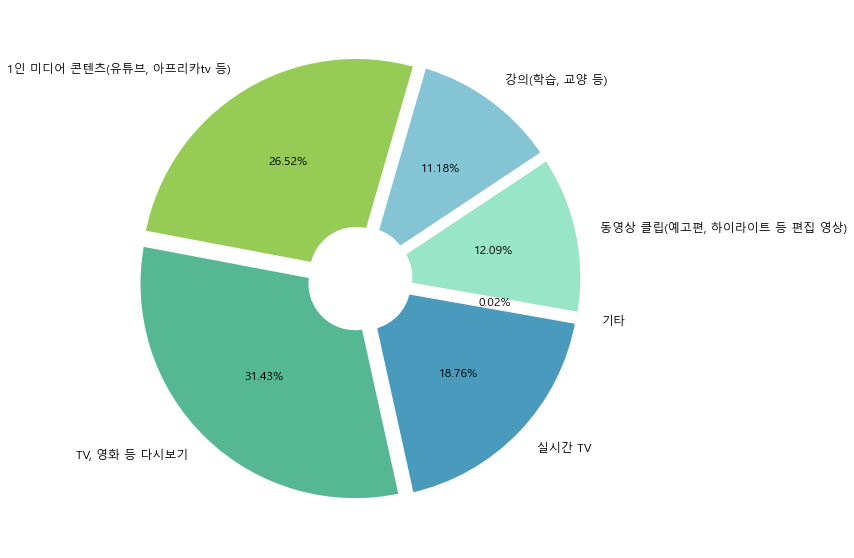

In [148]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = media_sum[0].tolist()
labels = ['실시간 TV', 'TV, 영화 등 다시보기', '1인 미디어 콘텐츠(유튜브, 아프리카tv 등)', '강의(학습, 교양 등)', '동영상 클립(예고편, 하이라이트 등 편집 영상)', '기타'] 
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
colors = ['#4A9ABE', '#55B794', '#96CB55', '#85C4D5', '#99E5C7', '#D3EEA7'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 6}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 기타가 포함되지 않은 그래프

In [152]:
media_sum2 = media_sum.drop(index=6)

In [156]:
media_sum2

,0
1.0,10824.0
2.0,18131.0
3.0,15297.0
4.0,6449.0
5.0,6976.0


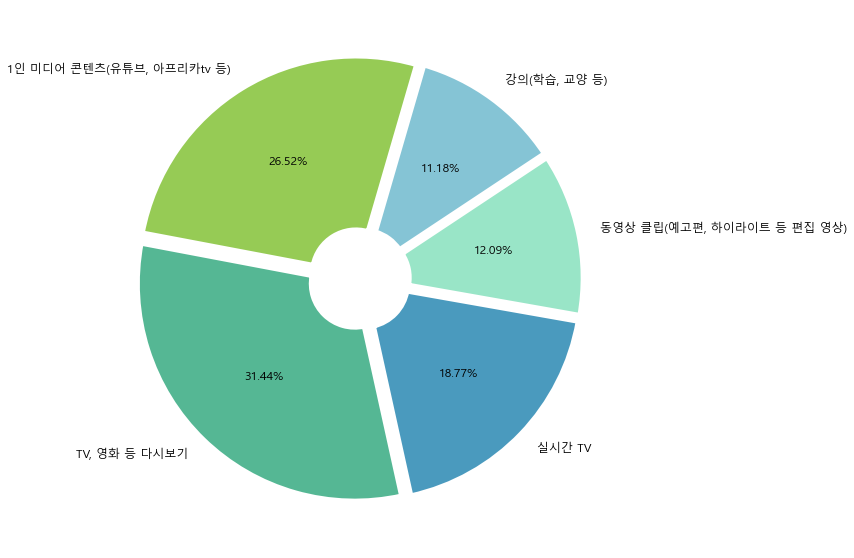

In [157]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = media_sum2[0].tolist()
labels = ['실시간 TV', 'TV, 영화 등 다시보기', '1인 미디어 콘텐츠(유튜브, 아프리카tv 등)', '강의(학습, 교양 등)', '동영상 클립(예고편, 하이라이트 등 편집 영상)'] 
explode = [0.03, 0.03, 0.03, 0.03, 0.03]
colors = ['#4A9ABE', '#55B794', '#96CB55', '#85C4D5', '#99E5C7'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

- TV, 영화 등 다시보기 > 1인 미디어 콘텐츠 > 실시간 TV > 동영상 클립 > 강의 순서
- TV, 영화 등 다시보기의 비율이 31.44%로 가장 높음
- 스마트폰 이용시 강의를 목적으로 이용하는 비율이 가장 낮음